# Simple Linear Regression

In [1]:
# from google.colab import files
# up = files.upload()

## import dataset

In [2]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,A,B,C,T
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [3]:
df = df[['A', 'T']]
df.head()

,A,T
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [4]:
# df.size
# df.shape
# df.info()
df.describe()

,A,T
count,1067.000000,1067.000000
mean,3.346298,256.228679
std,1.415895,63.372304
min,1.000000,108.000000
25%,2.000000,207.000000
50%,3.400000,251.000000
75%,4.300000,294.000000
max,8.400000,488.000000


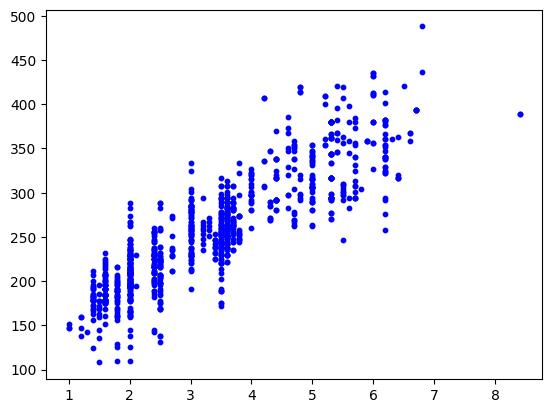

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['A'], df['T'],s=10, color='blue')
plt.show()

## cleaning

In [6]:
# clean the data 

## encoding

In [7]:
# encode the data

## define x , y

In [8]:
import numpy as np
x = np.array(df[['A']])
y = np.array(df['T'])

# x = df[['A']].values
# y = df['T'].values

In [9]:
y[:5]

array([196, 221, 136, 255, 244])

## spliting

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [11]:
### spliting without sklearn

# msk = np.random.rand(len(df)) < 0.8
# train = df[msk]
# test = df[~msk]

# x_train = np.array(train[['ENGINESIZE']])
# x_test = np.array(test[['ENGINESIZE']])
# y_train = np.array(train[['CO2EMISSIONS']])
# y_test = np.array(test[['CO2EMISSIONS']])

In [12]:
### finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     slr = LinearRegression()
#     slr.fit(x_train, y_train)
#     yhat_test = slr.predict(x_test)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

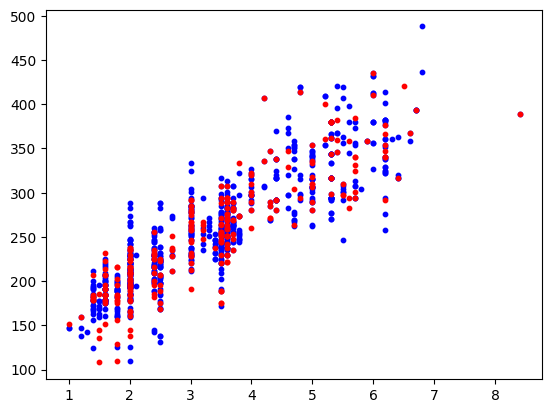

In [13]:
plt.scatter(x_train, y_train, s=10, c='b')
plt.scatter(x_test, y_test, s=10, c='r')
plt.show()

## scaling

In [14]:
# do not need for scaling in simple linear regression

## fit train data

In [15]:
# def param
# fit_intercept=True, copy_X=True, n_jobs=None, positive=False

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [17]:
print(slr.intercept_)
print(slr.coef_)

126.62361300856665
[38.89375359]


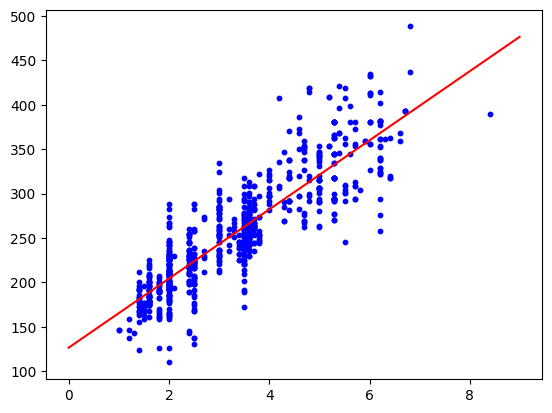

In [18]:
xx = np.arange(0,9,0.01)
plt.scatter(x_train, y_train, s=10, c='b')
plt.plot(xx, slr.intercept_ + slr.coef_[0] * xx, c='r')
plt.show()

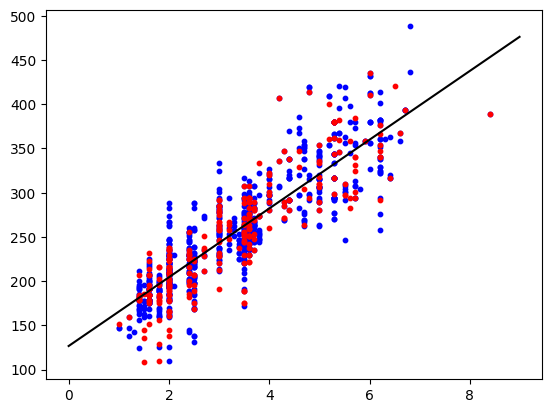

In [19]:
xx = np.arange(0,9,0.01)
plt.scatter(x_train, y_train, s=10, c='b')
plt.plot(xx, slr.intercept_ + slr.coef_[0] * xx, c='black')
plt.scatter(x_test, y_test, c='r', s=10)
plt.show()

In [20]:
### K-fold cross validation

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'fit_intercept': [True, False],
#     'copy_X': [True, False],
#     'n_jobs': [None],
#     'positive': [True, False]
# }

# lr = LinearRegression()
# gs = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

## predict test data

In [21]:
yhat_test = slr.predict(x_test)

## evaluate the model

In [22]:
from sklearn.metrics import r2_score
print("r2-score: %0.2f" % r2_score(y_test, yhat_test))

r2-score: 0.77


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"MSE: {mean_squared_error(y_test, yhat_test)}")
print(f"MAE: {mean_absolute_error(y_test, yhat_test)}")

MSE: 972.1181539625654
MAE: 23.804281919112945


In [24]:
### evaluate without sklearn

# print("MSE: %0.2f" % np.mean((y_test - yhat_test) ** 2))
# print("MAE: %0.2f" % np.mean(np.absolute(y_test - yhat_test)))

## predict new data

In [25]:
slr.predict([[0]])

array([126.62361301])

## save the model

In [26]:
# import joblib
# joblib.dump(slr, 'slr_model.pkl')

## load the model

In [27]:
# import joblib
# slr = joblib.load('slr_model.pkl')